# Random Variable Generation

In this tutorial, we will talk about Random Variable(RV) Generation.  
There are two types of RVs which we will be discussing their Generation: Discrete RVs and Continuous RVs.  

We may later define an auxiliary function which we will use in testing our results.

## Discrete RV Generation

As we will see later, the key to any RV generation technique is to have a uniformly distributed RV to start with, and  
which we will use to generate a random variable following our desired distribution.  
Python provides the functionality to generate a uniform RV using the uniform(a,b) function shown below.  
Usually, we prefer to generate our uniform RV as a value between 0 and 1, and then using basic mathematics, we can extend our range.

In [1]:
import random # this is the library containing the function
U = random.uniform(0,1) # generates a uniform random variable between 0 and 1
print(U)

0.015412528095930189


It is important to note that this function just samples a single random variable.  
We will want to generate a large number of samples to get a distribution of values.  


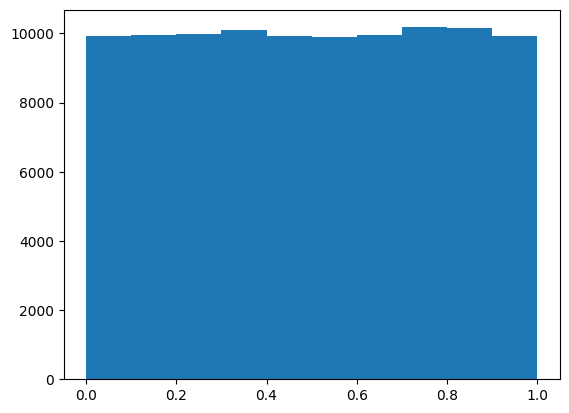

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = [] # we define an array to hold our generated uniform RVs  
for i in range(100000): # the more values we generate, the more the distribution fits the perfect case indeed
    x.append(random.uniform(0,1))
x = np.array(x) # we cast our array into a numpy array to be able to display it
plt.hist(x) # create a histogram of the values
plt.show() # display the histogram of our distribution

We can clearly see from the above graph that the generated RVs follow a unifrom distribution.

For completeness, We will define our own function for doing the same thing: generating a uniformly distributed RV.  
For that we will use a method called the Linear Congruential Generator  

### Linear Congruential Generator (LCG)

In [3]:
import time
a = 16807
m = pow(2,31) - 1
Xo = max(1, time.time() % 999)  # this could later be improved to be, for example, some function of the system time
def LCG():
    global  Xo
    Xn = (a * Xo) % m
    Xo = Xn
    return Xn
    
# U = U(0,1) has values in range [0,1)
# U = LCG()/m : represents a uniform continuous RV between 0 and 1 ==> U ~Uniform_RV[0,1)
# X = a + (b - a) * U

The following function will use the random number generated by the LCG method to generate a
continuous uniform RV in range [0,1) according to the rules described above.

In [4]:
def uniform_continuous_rv(a = 0, b = 1):
    return a + (LCG() / m) * (b - a)

We will test this function. We will use the same exact same code we used in "testing" the  
built-in python function, except that we will call our own function instead of python's.

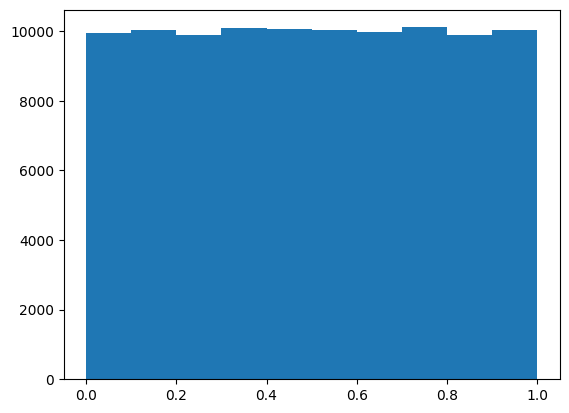

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x = [] # we define an array to hold our generated uniform RVs  
for i in range(100000): # the more values we generate, the more the distribution fits the perfect case indeed
    x.append(uniform_continuous_rv(0,1))
x = np.array(x) # we cast our array into a numpy array to be able to display it
plt.hist(x) # create a histogram of the values
plt.show() # display the histogram of our distribution

As we can see, the resulting graph is shows a very good uniform distribution, as expected.

We can also generate a discrete uniform RV.

In [6]:
# Note that int(N*U) gives values in range [0,N-1], but we want our range to be from a upto and including b
# So our formula becomes:
# X = a + int((b - a + 1) * U)
def uniform_discrete_rv(a = 0, b = 1):
    return a + int((LCG()/m) * (b - a + 1))

## Geometric Discrete RV

In [7]:
import math
def geometric_discrete_rv(p = 0.5):
    U = uniform_continuous_rv()
    return int(math.log10(U)/math.log10(1-p)) + 1

We will test it.

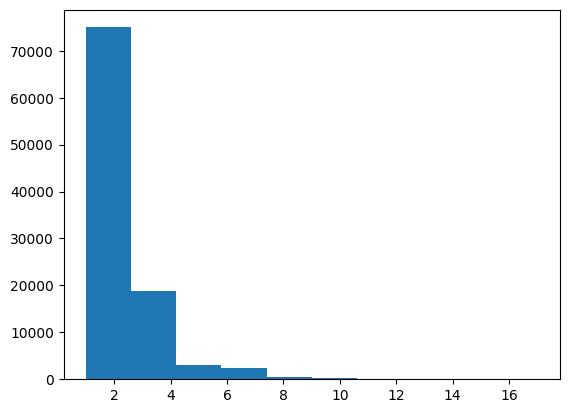

In [8]:
import numpy as np
import matplotlib.pyplot as plt
x = [] # we define an array to hold our generated uniform RVs  
for i in range(100000): # the more values we generate, the more the distribution fits the perfect case indeed
    x.append(geometric_discrete_rv(0.5))
x = np.array(x) # we cast our array into a numpy array to be able to display it
plt.hist(x) # create a histogram of the values
plt.show() # display the histogram of our distribution

## Binomial Discrete RV

In [9]:
def binomial_discrete_rv(n = 1, p = 0.5):
    U = uniform_continuous_rv()
    c = p/(1-p)
    i = 0
    pr = pow(1-p, n)
    F = pr
    while(U >= F):
        pr = c * ((n - i) / (i + 1)) * pr
        F = F + pr
        i = i + 1
    return i

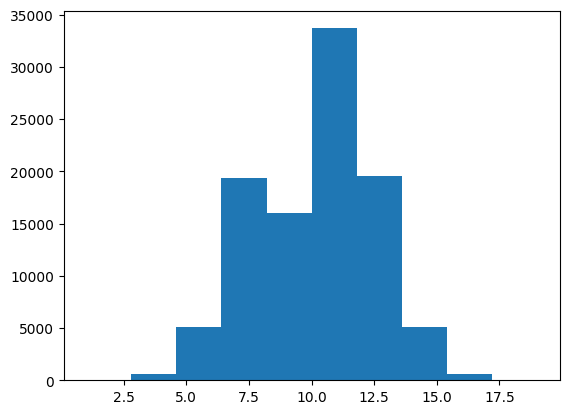

In [15]:
import numpy as np
import matplotlib.pyplot as plt
x = [] # we define an array to hold our generated uniform RVs  
for i in range(100000): # the more values we generate, the more the distribution fits the perfect case indeed
    x.append(binomial_discrete_rv(20, 0.5))
x = np.array(x) # we cast our array into a numpy array to be able to display it
plt.hist(x) # create a histogram of the values
plt.show() # display the histogram of our distribution

## Poisson Discrete RV

In [14]:
def naive_poisson_discrete_rv(_lambda= 1):
    U = uniform_continuous_rv()
    i = 0
    p = math.exp(-_lambda)
    F = p
    while(U >= F):
        p = _lambda * p/(i + 1)
        F = F + p
        i = i + 1
    return i

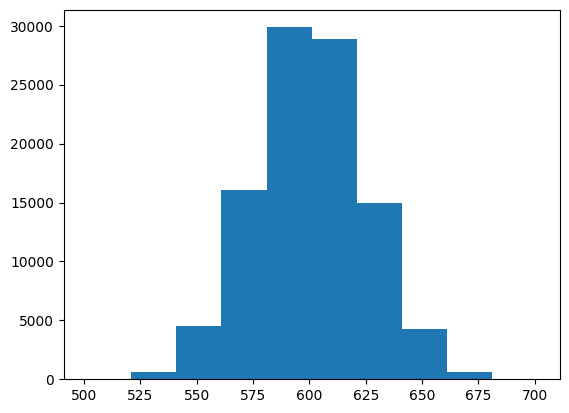

In [48]:
import numpy as np
import matplotlib.pyplot as plt
x = [] # we define an array to hold our generated uniform RVs  
for i in range(100000): # the more values we generate, the more the distribution fits the perfect case indeed
    x.append(naive_poisson_discrete_rv(600))
x = np.array(x) # we cast our array into a numpy array to be able to display it
plt.hist(x) # create a histogram of the values
plt.show() # display the histogram of our distribution

The most likely value occurs at X = lambda, followed by X = lambda-1, then X = lambda+1  
The average number of searches done is =  (1 + lambda) ==> O(lambda) - big-O(lambda)  
-> This is not acceptable for large values of lambda  
Fortunately, we can do better  

In [32]:
def utility_function(_lambda = 1): # this function tabulates/memoizes the CDF as we don't have to calculate it every time
    arr = []
    p = math.exp(-_lambda)
    arr.append(p)
    for i in range(1, _lambda + 1):
        arr.append((_lambda/i)*arr[i-1])
    return arr
def poisson_discrete_rv(_lambda = 1):
    global F
    U = uniform_continuous_rv()
    i = int(_lambda) # i is initialized to lambda
    if(U <= F): # if U <= F we will search in the lower range (X < lambda)
        while(U <= F):
            F = F - arr[i]
            i = i - 1
        # we are here at the condition that F < U
        i = i + 1
    elif (U > F): # if U > F we will search in the upper range (X > lambda)
        while(U > F):
            i = i + 1
            arr.append((_lambda/i)*arr[i-1])
            F = F + arr[i]
        # i = i - 1
    return i

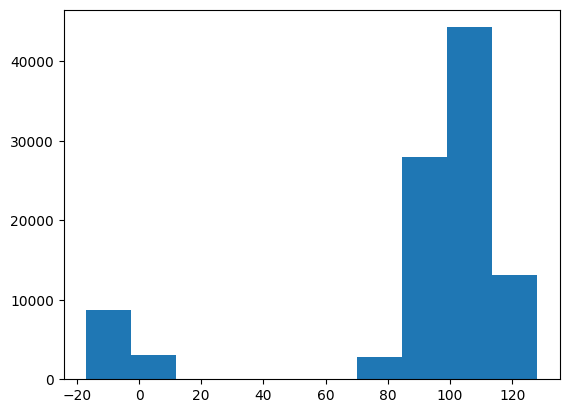

In [52]:
# Here we will first have to provide our value of lambda to the utility function to tabulate the CDF first
# we will call the utility function with the input lambda value
arr = []
arr = utility_function(100)
F = sum(arr) # F represents the CDF up to X = lambda
import numpy as np
import matplotlib.pyplot as plt
x = [] # we define an array to hold our generated uniform RVs  
for i in range(100000): # the more values we generate, the more the distribution fits the perfect case indeed
    x.append(poisson_discrete_rv(100))
x = np.array(x) # we cast our array into a numpy array to be able to display it
plt.hist(x) # create a histogram of the values
plt.show() # display the histogram of our distribution

On testing both functions with the same input, we find that the optimized one gives a far better performance, especially for  
large values of lambda. For instance, at lambda = 600, the naive implementation takes about 8 seconds, while the  
optimized implementation takes about 1 to 2 seconds.  
For larger values of lambda, both are quite slow, even though the optimized is still far better.

## Exponential Continuous RV

In [34]:
# f(x) = lambda * exp(-lambda * x) , for 0 <= x < inf
# Remember: the mean of an exponential RV is myoo = 1/lambda and the variance is 1/lambda^2
def exponential_continuous_rv(_lambda = 1):
    U = uniform_continuous_rv()
    return (-1/_lambda) * math.log10(U)

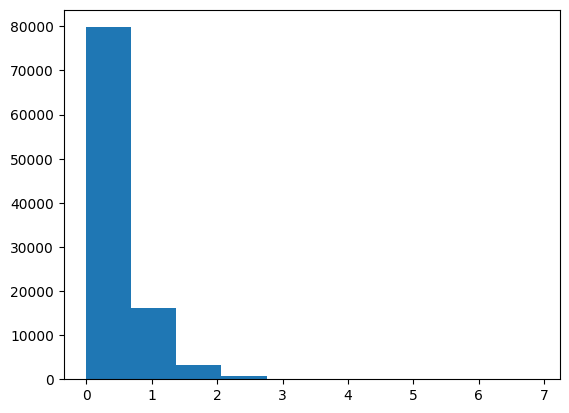

In [12]:
import numpy as np
import matplotlib.pyplot as plt
x = [] # we define an array to hold our generated uniform RVs  
for i in range(100000): # the more values we generate, the more the distribution fits the ideal case
    x.append(exponential_continuous_rv(1))
x = np.array(x) # we cast our array into a numpy array to be able to display it
plt.hist(x) # create a histogram of the values
plt.show() # display the histogram of our distribution